In [618]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [619]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='!@QWaszx23we',
    database='car_data'
)

cursor = connection.cursor()
query = "SELECT * FROM car_info"
df = pd.read_sql(query, connection)


In [622]:
print(df.head(5))
print(df.tail(5))  

  Make       Model  Year             Engine_Fuel_Type  Engine_HP  \
0  BMW  1 Series M  2011  premium unleaded (required)     335.00   
1  BMW    1 Series  2011  premium unleaded (required)     300.00   
2  BMW    1 Series  2011  premium unleaded (required)     300.00   
3  BMW    1 Series  2011  premium unleaded (required)     230.00   
4  BMW    1 Series  2011  premium unleaded (required)     230.00   

   Engine_Cylinders Transmission_Type     Driven_Wheels  Number_of_Doors  \
0              6.00            MANUAL  rear wheel drive             2.00   
1              6.00            MANUAL  rear wheel drive             2.00   
2              6.00            MANUAL  rear wheel drive             2.00   
3              6.00            MANUAL  rear wheel drive             2.00   
4              6.00            MANUAL  rear wheel drive             2.00   

                         Market_Category Vehicle_Size Vehicle_Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [624]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
Highway_MPG            int64
City_MPG               int64
Popularity             int64
MSRP                   int64
dtype: object

In [626]:
df = df.drop(['Engine_Fuel_Type', 'Popularity', 'Number_of_Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,MSRP
0,BMW,1 Series M,2011,335.00,6.00,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [628]:
df = df.rename(columns={"Engine_HP": "HP", "Engine_Cylinders": "Cylinders", "Transmission_Type": "Transmission", "Driven_Wheels": "Drive Mode","highway_MPG": "MPG-H", "city_mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Price
0,BMW,1 Series M,2011,335.00,6.00,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [630]:
df.shape

(11914, 13)

In [632]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (716, 13)


In [634]:
df.count() 

Make               11914
Model              11914
Year               11914
HP                 11845
Cylinders          11884
Transmission       11914
Drive Mode         11914
Market_Category     8172
Vehicle_Size       11914
Vehicle_Style      11914
Highway_MPG        11914
City_MPG           11914
Price              11914
dtype: int64

In [636]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Price
0,BMW,1 Series M,2011,335.00,6.00,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6.00,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6.00,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [638]:
df.count()

Make               11198
Model              11198
Year               11198
HP                 11129
Cylinders          11168
Transmission       11198
Drive Mode         11198
Market_Category     7823
Vehicle_Size       11198
Vehicle_Style      11198
Highway_MPG        11198
City_MPG           11198
Price              11198
dtype: int64

In [640]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission          0
Drive Mode            0
Market_Category    3375
Vehicle_Size          0
Vehicle_Style         0
Highway_MPG           0
City_MPG              0
Price                 0
dtype: int64


In [642]:
df = df.dropna()
df.count()

Make               7736
Model              7736
Year               7736
HP                 7736
Cylinders          7736
Transmission       7736
Drive Mode         7736
Market_Category    7736
Vehicle_Size       7736
Vehicle_Style      7736
Highway_MPG        7736
City_MPG           7736
Price              7736
dtype: int64

In [644]:
df = df[df['HP'] != 0]
df = df[df['Price'] != 0]
df = df[df['Highway_MPG'] <= 250]
df = df[df['City_MPG'] <= 250]
df = df[df['Year'] == 2017]
print(df.shape)


(1242, 13)


In [646]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Market_Category    0
Vehicle_Size       0
Vehicle_Style      0
Highway_MPG        0
City_MPG           0
Price              0
dtype: int64


<Axes: xlabel='Price'>

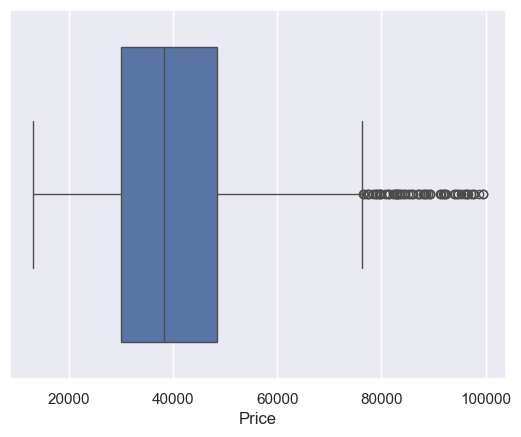

In [648]:
filtered_df = df[df['Price'] <= 100000]

sns.boxplot(x=filtered_df['Price'])

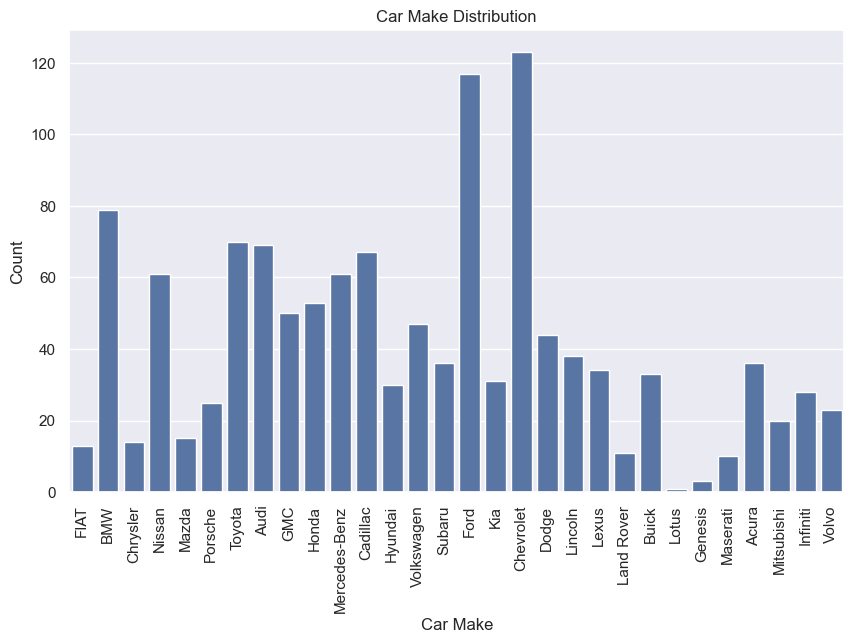

In [650]:
plt.figure(figsize=(10,6))
sns.countplot(x='Make', data=df)
plt.title('Car Make Distribution')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='City_MPG'>

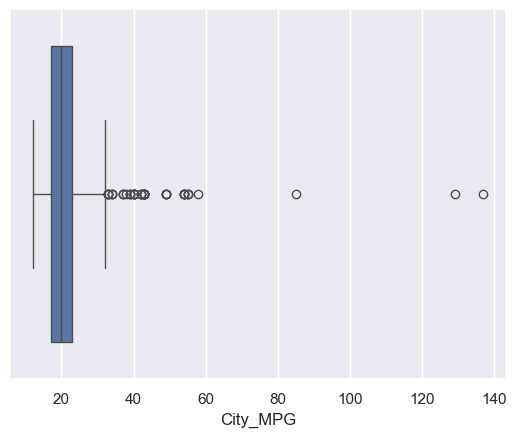

In [652]:
sns.boxplot(x=df['City_MPG'])

<Axes: xlabel='HP'>

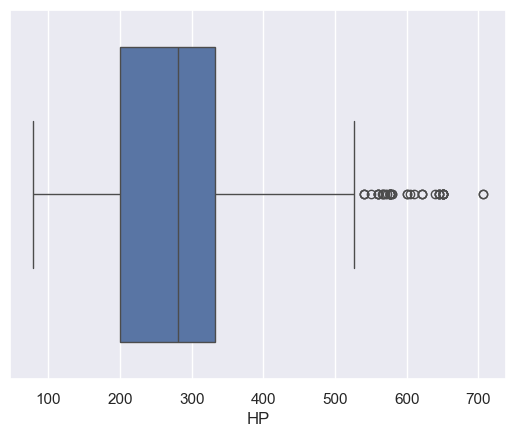

In [654]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

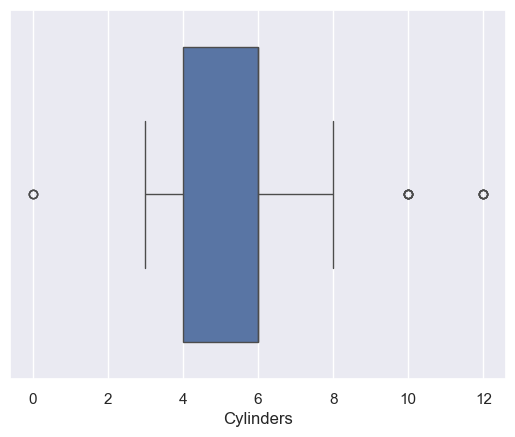

In [656]:
sns.boxplot(x=df['Cylinders'])

In [658]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Year,HP,Cylinders,Highway_MPG,City_MPG,Price
count,"1,242.00","1,242.00","1,242.00","1,242.00","1,242.00","1,242.00"
mean,"2,017.00",284.53,5.44,28.17,21.06,"45,328.07"
std,0.00,107.48,1.57,6.77,7.82,"25,952.60"
min,"2,017.00",78.00,0.00,17.00,12.00,"12,995.00"
25%,"2,017.00",200.00,4.00,24.00,17.00,"30,535.00"
50%,"2,017.00",281.50,6.00,27.50,20.00,"38,985.00"
75%,"2,017.00",333.00,6.00,31.00,23.00,"50,666.25"
max,"2,017.00",707.00,12.00,111.00,137.00,"247,900.00"


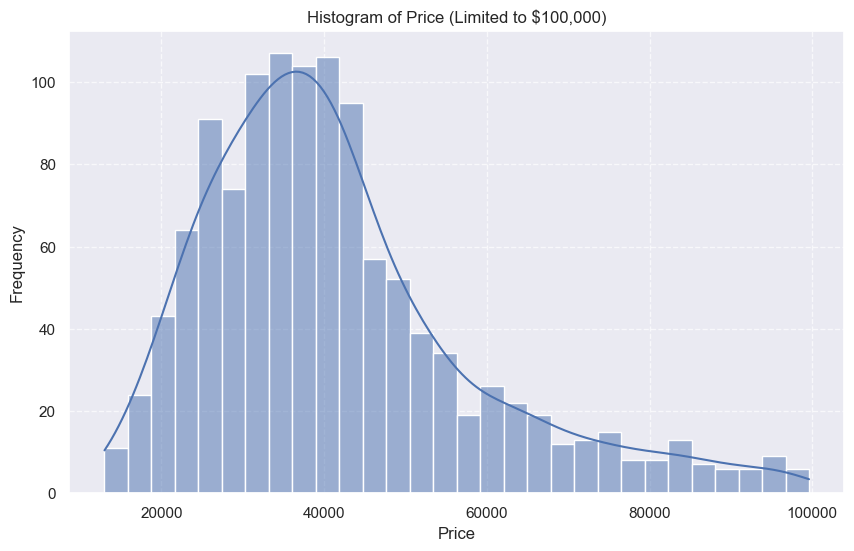

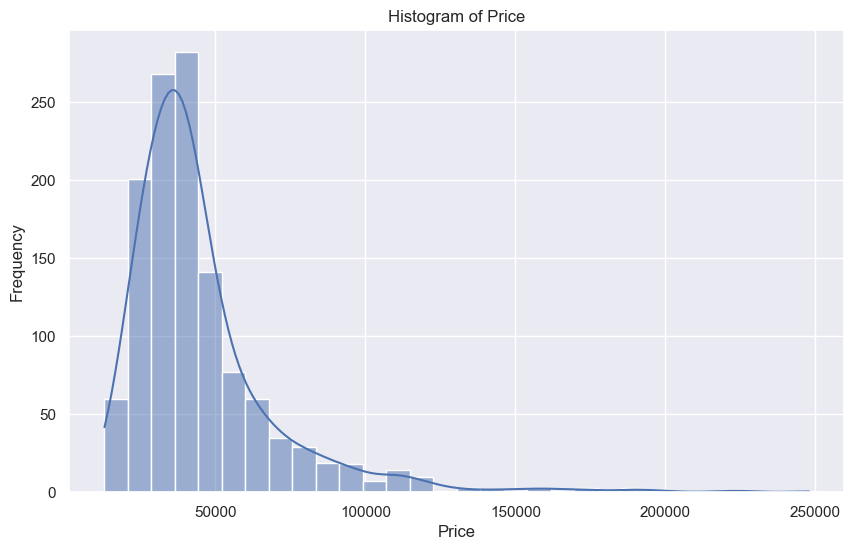

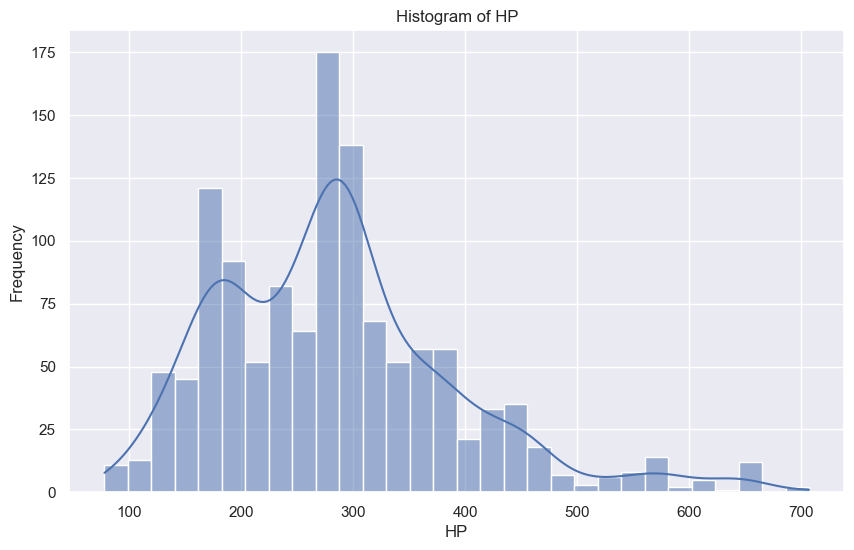

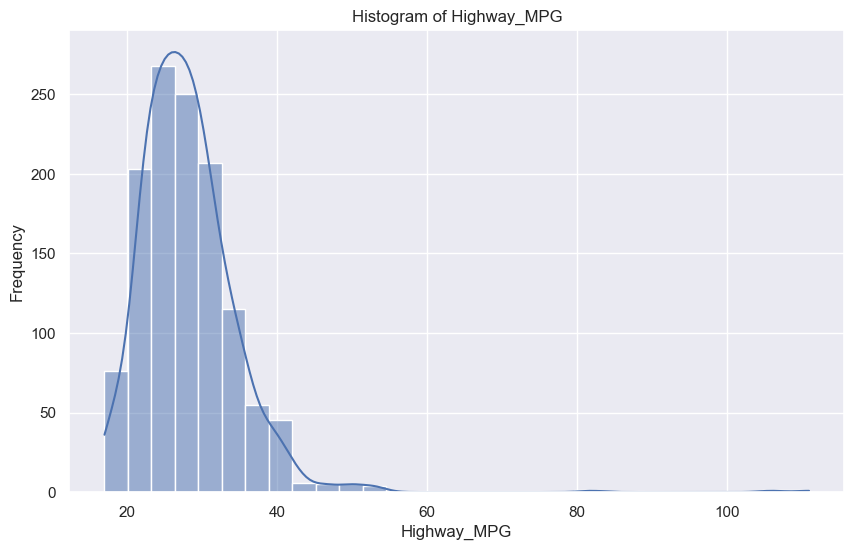

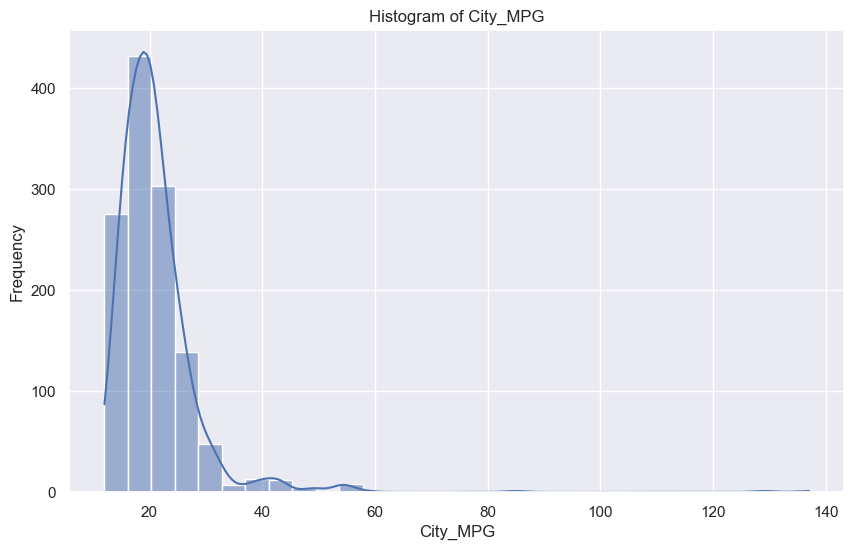

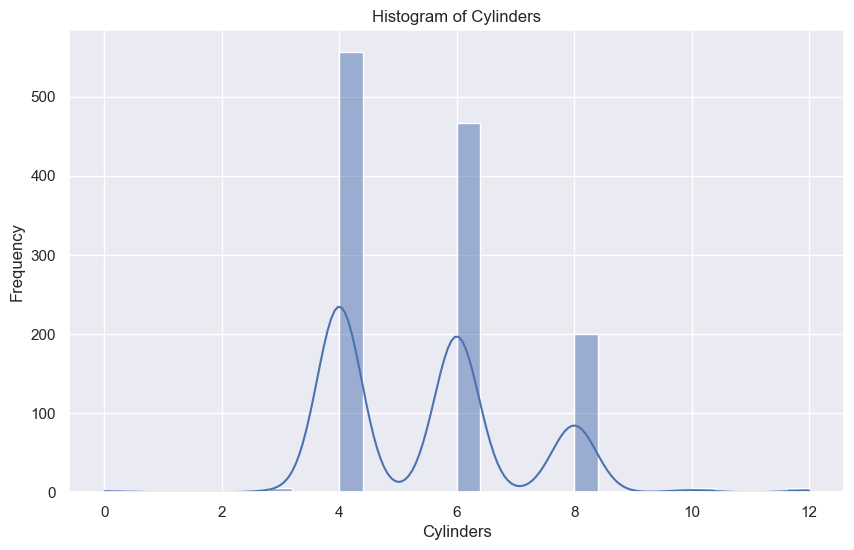

In [660]:
key_features = ['Price', 'HP', 'Highway_MPG', 'City_MPG', 'Cylinders']

filtered_df = df[df['Price'] <= 100000]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Price', bins=30, kde=True)
plt.title('Histogram of Price (Limited to $100,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

,HP,Cylinders,Highway_MPG,City_MPG,Price
HP,1.00,0.85,-0.59,-0.54,0.78
Cylinders,0.85,1.00,-0.66,-0.60,0.62
Highway_MPG,-0.59,-0.66,1.00,0.93,-0.36
City_MPG,-0.54,-0.60,0.93,1.00,-0.33
Price,0.78,0.62,-0.36,-0.33,1.00


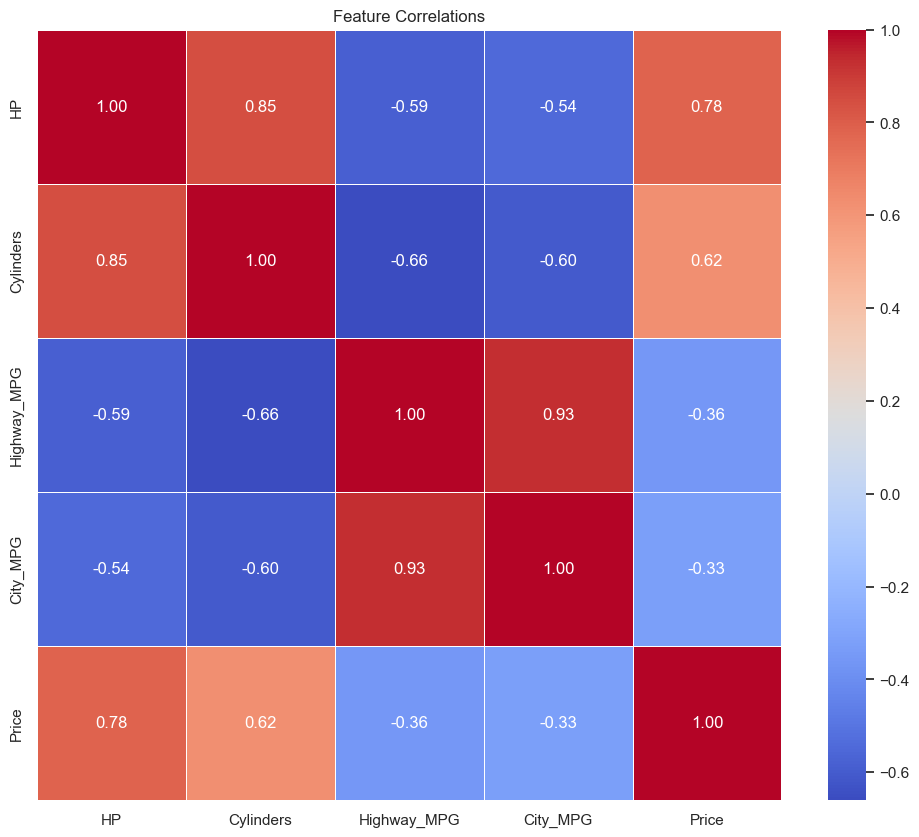

In [661]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Year'])

c = numeric_df.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(c, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations')
c

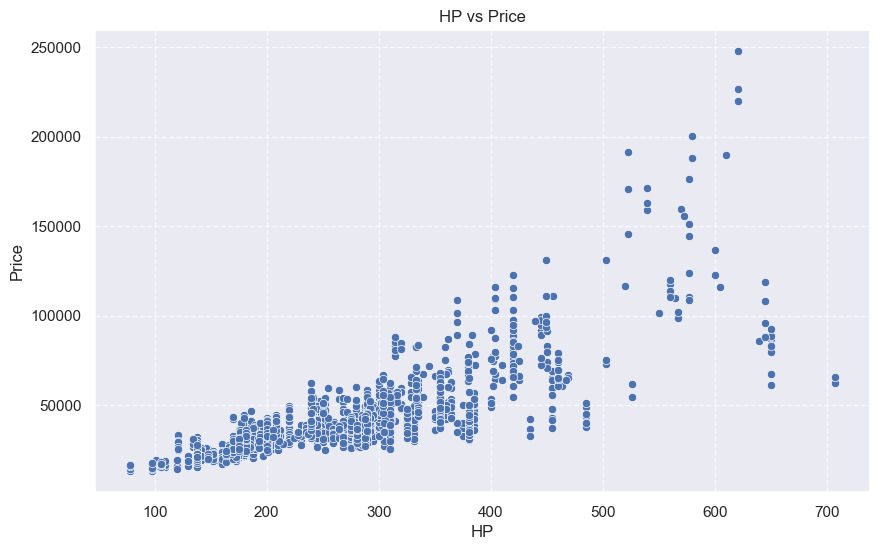

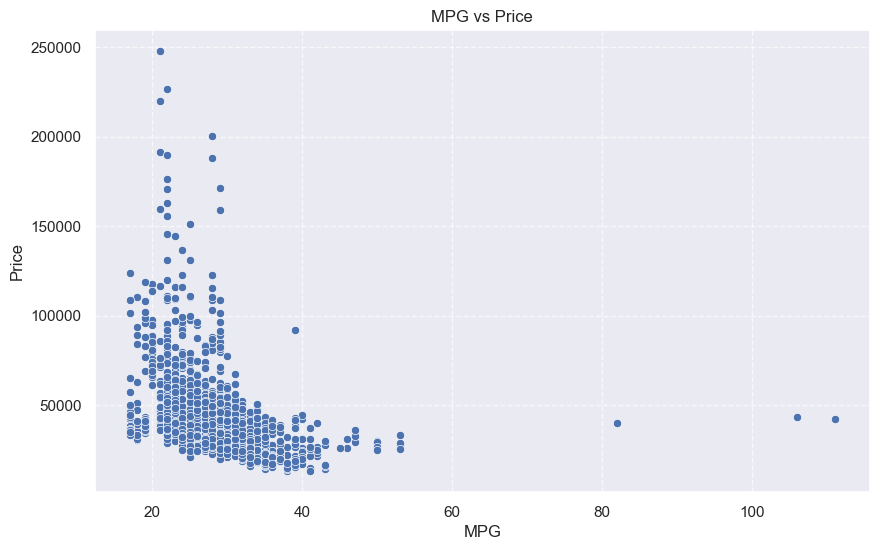

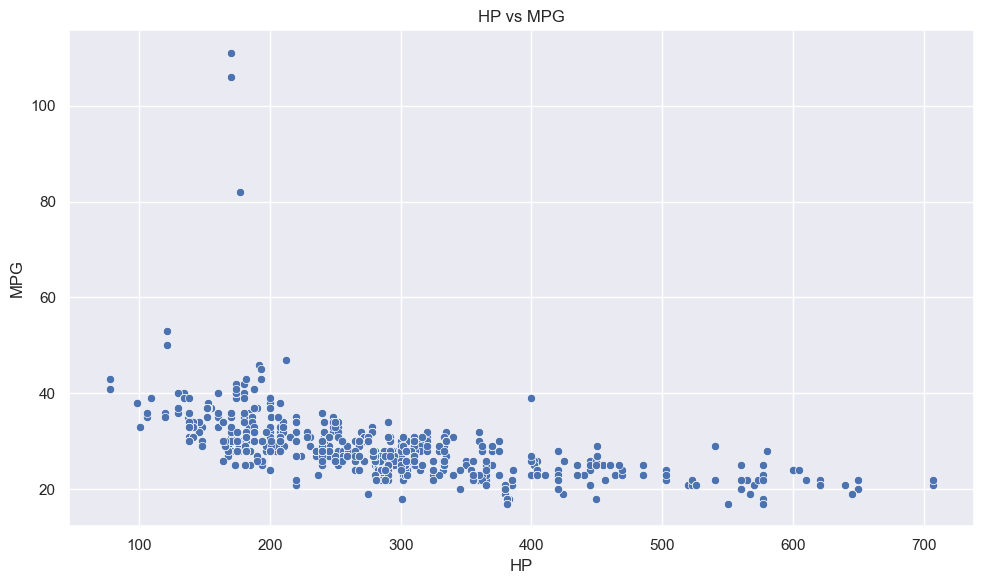

In [662]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HP', y='Price')
plt.title('HP vs Price')
plt.xlabel('HP')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='Highway_MPG', y='Price')
plt.title('MPG vs Price')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='HP', y='Highway_MPG', data=df)
plt.title('HP vs MPG')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

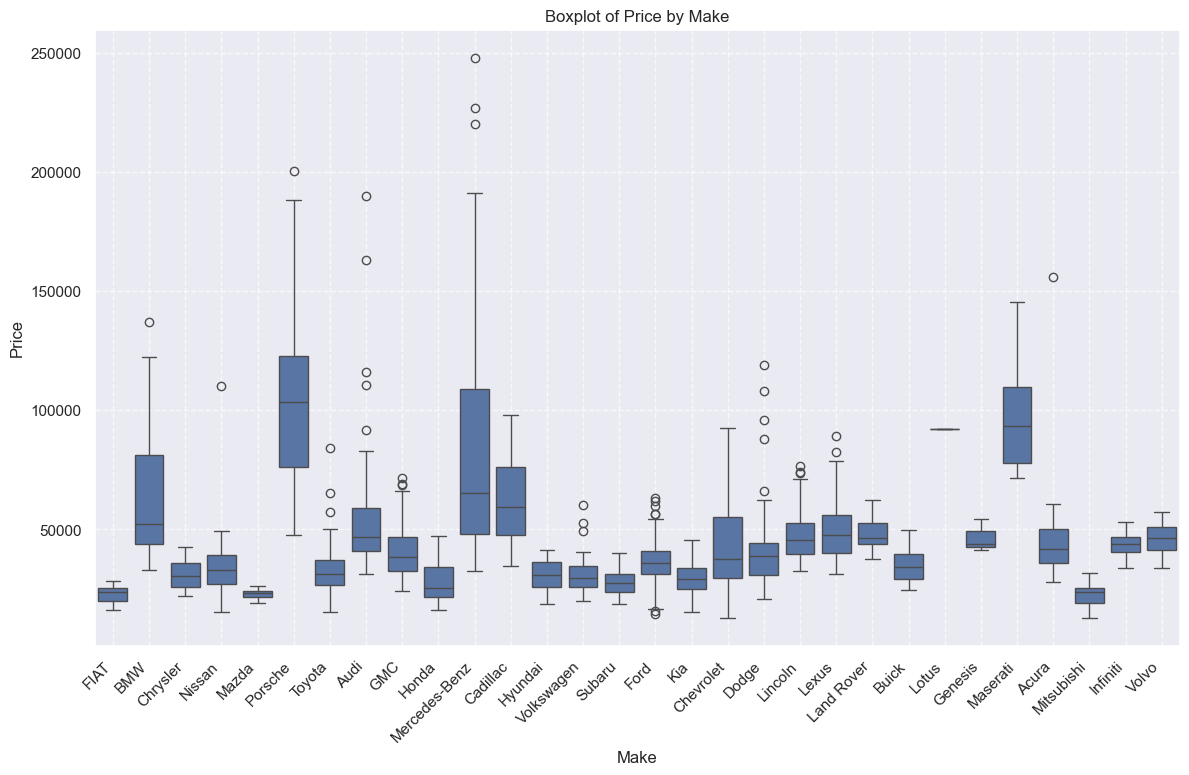

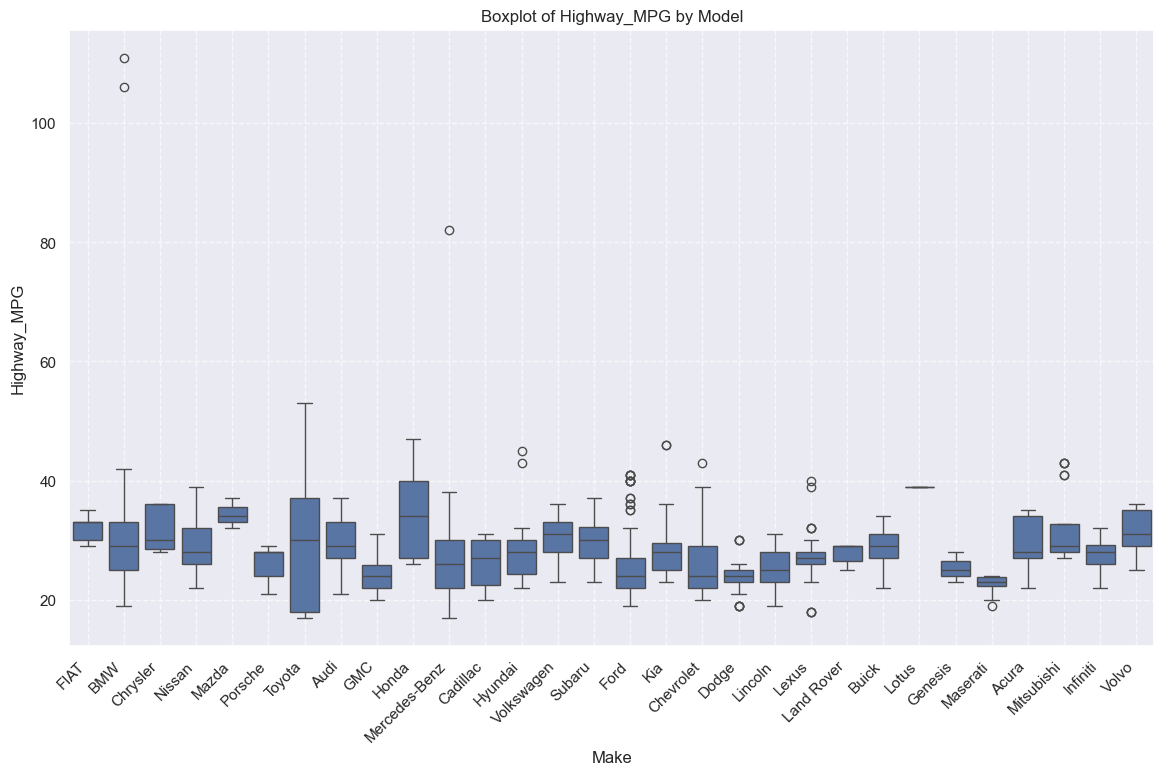

In [665]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Make', y='Price')
plt.title('Boxplot of Price by Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Make', y='Highway_MPG')
plt.title('Boxplot of Highway_MPG by Model')
plt.xlabel('Make')
plt.ylabel('Highway_MPG')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

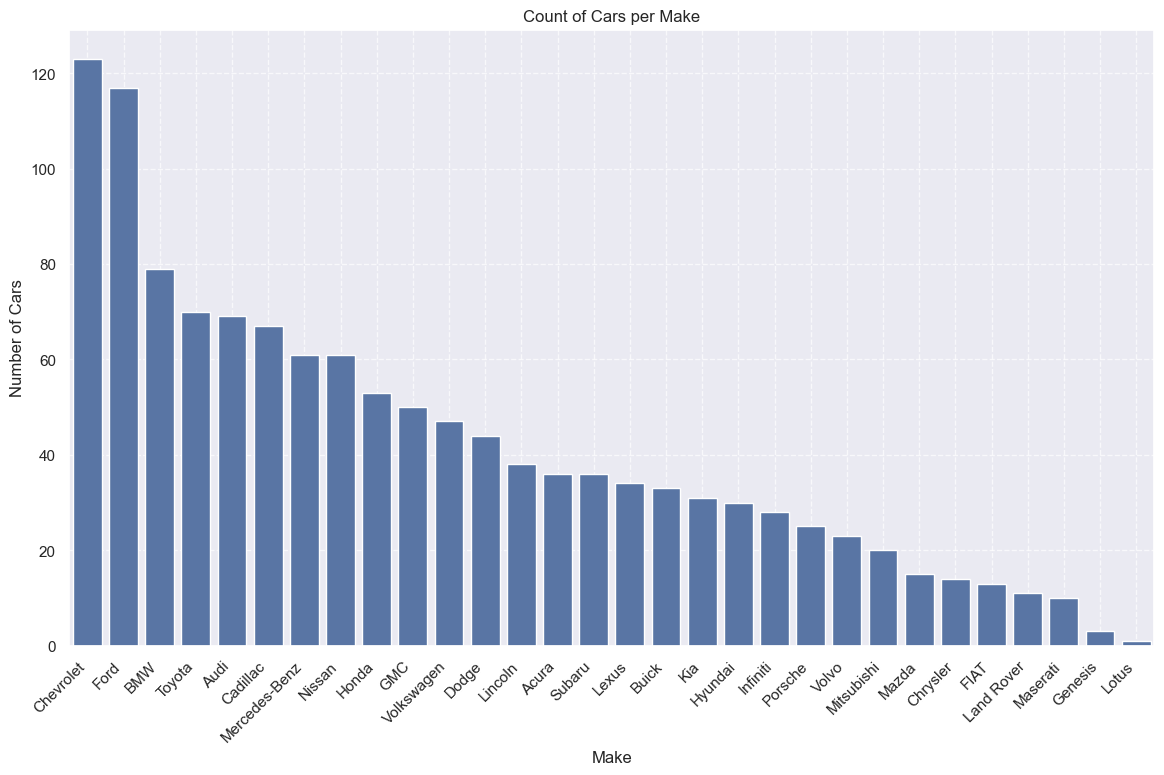

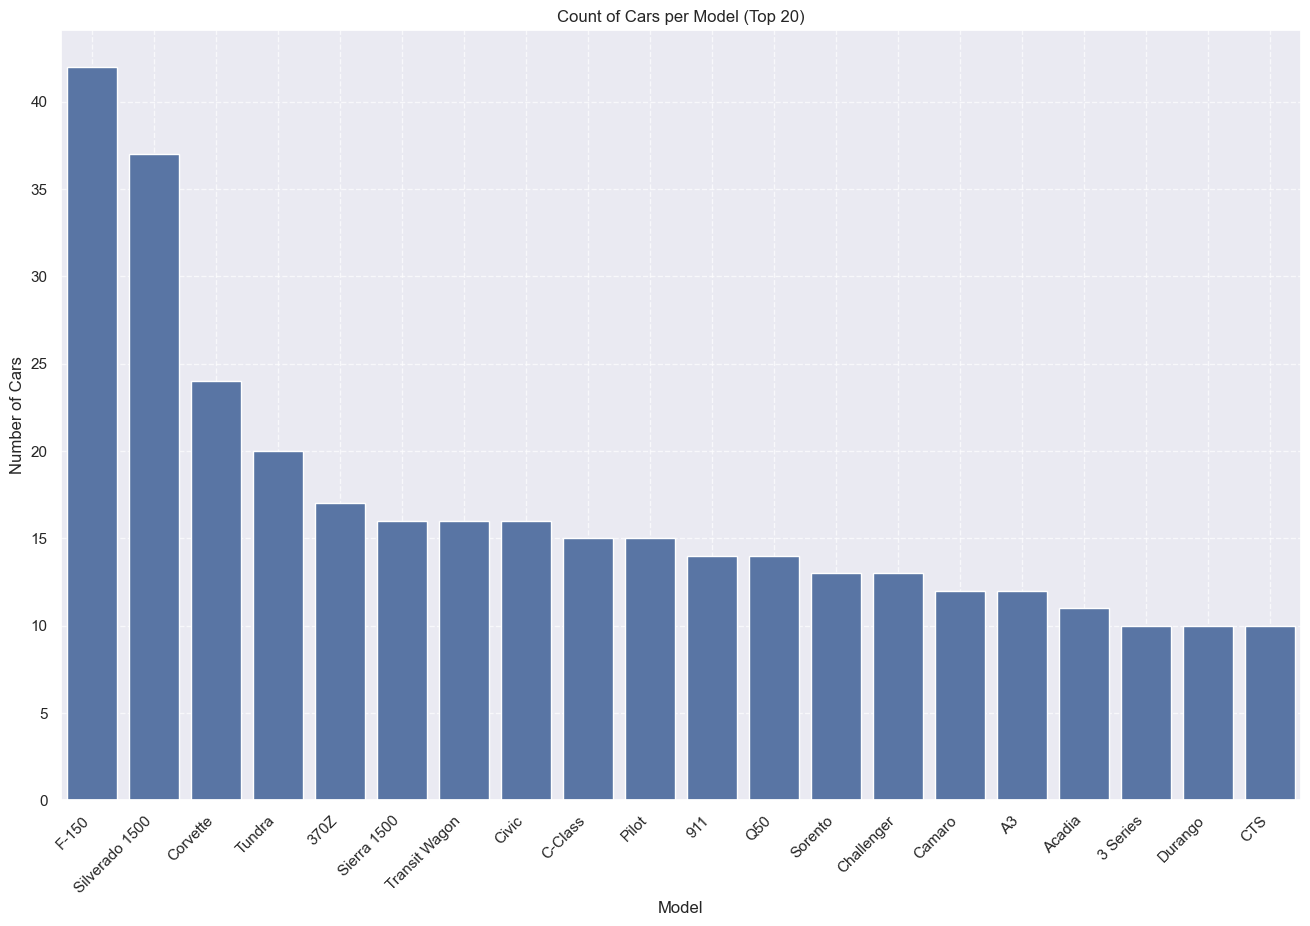

In [668]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index)
plt.title('Count of Cars per Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

top_models = df['Model'].value_counts().nlargest(20).index

plt.figure(figsize=(16, 10))
sns.countplot(data=df[df['Model'].isin(top_models)], x='Model', order=top_models)
plt.title('Count of Cars per Model (Top 20)')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [670]:
numTrain = 20
numTest = df.shape[0] - numTrain

X = df[['HP']]
y = df['Price']

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [672]:
regr =linear_model.LinearRegression()

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_mse_scores = cross_val_score(regr, X_train, y_train, cv=5, scoring=mse_scorer)

cv_mse_mean = -np.mean(cv_mse_scores)
cv_rmse_mean = np.sqrt(cv_mse_mean)

print(f"Cross-Validation MSE (mean): {cv_mse_mean:.4f}")
print(f"Cross-Validation RMSE (mean): {cv_rmse_mean:.4f}")

regr.fit(X_train, y_train)

Cross-Validation MSE (mean): 37505694.3358
Cross-Validation RMSE (mean): 6124.1893


LinearRegression()

Root mean squared error = 19528.0454
R-squared = 0.4394


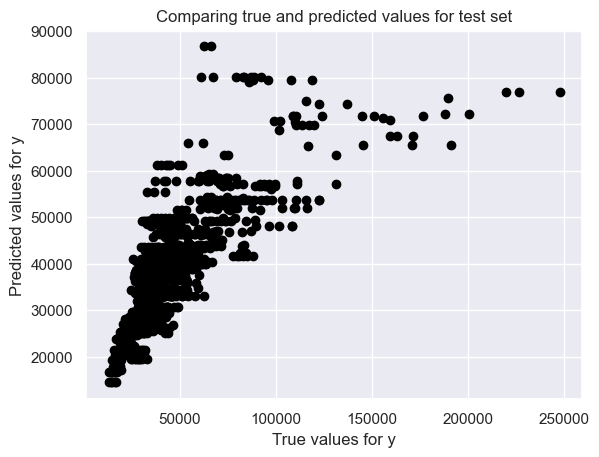

In [674]:
y_pred_test = np.maximum(0, regr.predict(X_test))

plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [676]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_test)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

MSE: 381344557.5423
RMSE: 19528.0454
R-squared: 0.4394


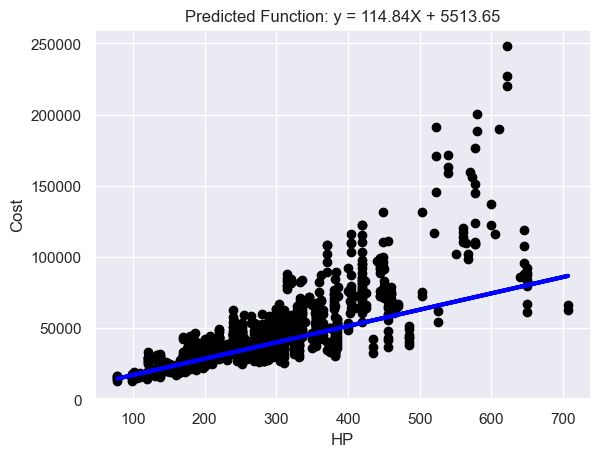

In [678]:
y_pred_test = [max(0, pred) for pred in y_pred_test]

plt.scatter(X_test, y_test, color='black') 
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)

titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('HP')
plt.ylabel('Cost')

plt.ylim(bottom=0)

plt.show()

In [680]:
print('Predicted cost of a car with 200hp = $%.2f' % (regr.coef_[0] * 200 + regr.intercept_))
print('Predicted cost of a car with 300hp = $%.2f' % (regr.coef_[0] * 300 + regr.intercept_))
print('Predicted cost of a car with 400hp = $%.2f' % (regr.coef_[0] * 400 + regr.intercept_))

Predicted cost of a car with 200hp = $28481.66
Predicted cost of a car with 300hp = $39965.66
Predicted cost of a car with 400hp = $51449.66


In [682]:
df_price = df
df_price = df_price[['Make', 'Model', 'Price', 'HP', 'Highway_MPG']].dropna()

X = df_price[['HP', 'Highway_MPG']]
y = df_price['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=mse_scorer)
print("Cross-Validation MSE scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -np.mean(cv_scores))

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Cross-Validation MSE scores: [2.89586243e+08 1.86347575e+08 3.50726425e+08 2.18475681e+08
 2.43567530e+08]
Mean Cross-Validation MSE: 257740690.8662401
Mean Squared Error: 251927501.03025338


In [686]:
df_price['predicted_price'] = ridge_model.predict(X_scaled)

df_price['value_metric'] =df_price['predicted_price'] / df_price['Price']

best_value_cars = df_price.sort_values(by='value_metric', ascending=False)

print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

price_ranges = {
    'under_20000': 20000,
    'under_25000': 25000,
    'under_35000': 35000,
    'under_45000': 45000,
    'under_60000': 60000
}
for label, max_price in price_ranges.items():
    filtered_cars = df_price[df_price['Price'] <= max_price]
    best_value_cars = filtered_cars.sort_values(by='value_metric', ascending=False)
    
    print(f"\nTop 10 best value cars under ${max_price}:")
    print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

            Make       Model  Price  predicted_price     HP  Highway_MPG  \
7093        Ford     Mustang  32645        73,740.50 435.00           25   
2467       Dodge  Challenger  37995        82,743.98 485.00           23   
2196   Chevrolet      Camaro  36905        77,780.71 455.00           25   
2506       Dodge     Charger  39995        83,841.03 485.00           25   
2470       Dodge  Challenger  62495       126,493.29 707.00           21   
7091        Ford     Mustang  36645        73,740.50 435.00           25   
7087        Ford     Mustang  25645        51,231.79 310.00           30   
11036     Toyota      Tundra  30400        58,992.26 381.00           18   
2474       Dodge  Challenger  42795        82,743.98 485.00           23   
2500       Dodge     Charger  65945       127,041.82 707.00           22   

       value_metric  
7093           2.26  
2467           2.18  
2196           2.11  
2506           2.10  
2470           2.02  
7091           2.01  
7087     

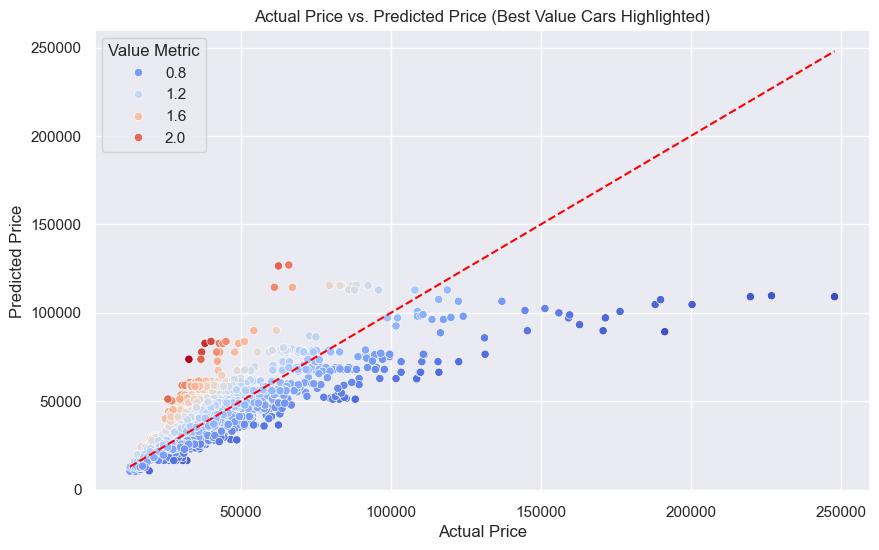

In [688]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_price, x='Price', y='predicted_price', hue='value_metric', palette='coolwarm')
plt.plot([min(df_price['Price']), max(df_price['Price'])], [min(df_price['Price']), max(df_price['Price'])], color='red', linestyle='--')
plt.title('Actual Price vs. Predicted Price (Best Value Cars Highlighted)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend(title='Value Metric', loc='best')
plt.show()

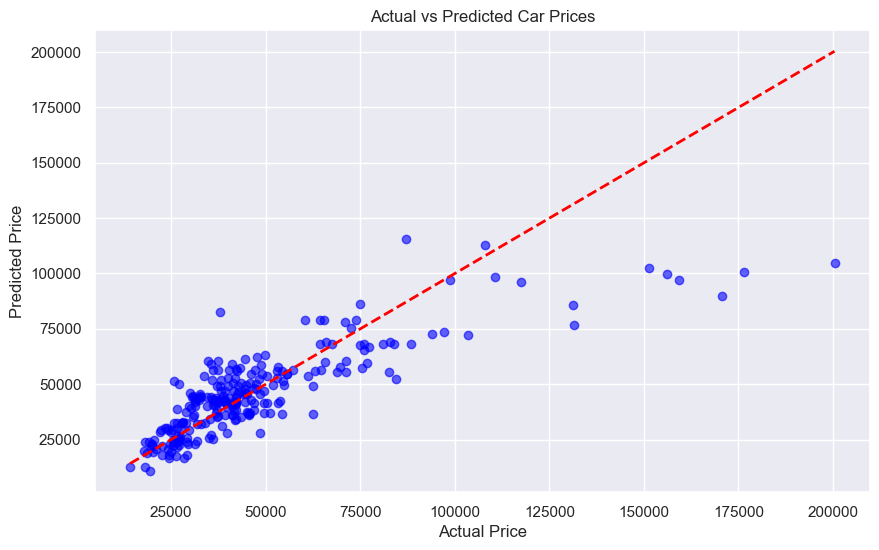

In [690]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

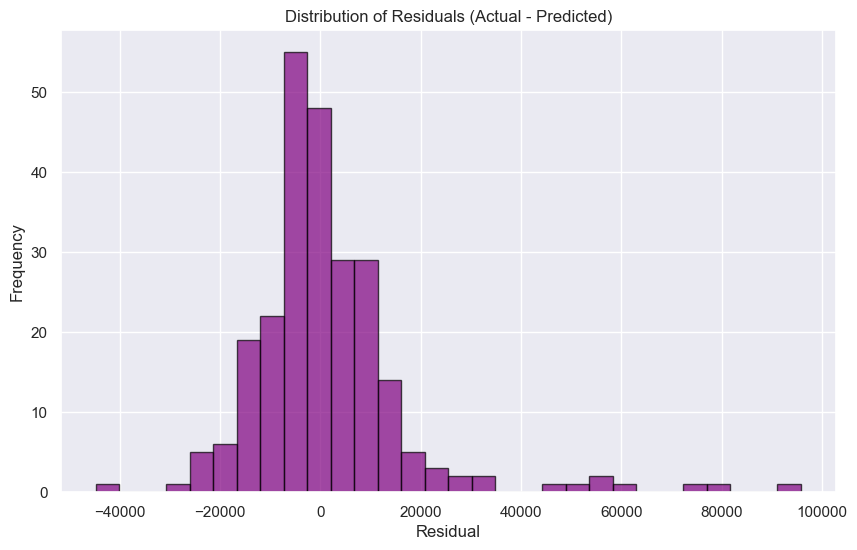

In [692]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [694]:
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Metrics:
MSE: 251927501.03025338
RMSE: 15872.224199218375
R-squared: 0.6751521019588138


In [696]:
df_price = df
df_price = df_price[['Make', 'Model', 'Price', 'HP', 'Highway_MPG']].dropna()

X = df_price[['HP', 'Highway_MPG']]
y = df_price['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [698]:
decision_tree = DecisionTreeRegressor(random_state=42)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring=mse_scorer)

print("Cross-Validation MSE scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -np.mean(cv_scores))

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Cross-Validation MSE scores: [9.60712929e+07 1.01655819e+08 9.80565477e+07 1.29686065e+08
 8.79697176e+07]
Mean Cross-Validation MSE: 102687888.44425121
Mean Squared Error: 109047360.37889814


In [700]:
df_price['predicted_price'] = decision_tree.predict(X_scaled)

df_price['value_metric'] =  (0.4 * df['HP'] + 0.4 * df['Highway_MPG']) / (0.2 * df['Price'])

best_value_cars = df_price.sort_values(by='value_metric', ascending=False)

print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

price_ranges = {
    'under_20000': 20000,
    'under_25000': 25000,
    'under_35000': 35000,
    'under_45000': 45000,
    'under_60000': 60000
}

for label, max_price in price_ranges.items():
    filtered_cars = df_price[df_price['Price'] <= max_price]
    best_value_cars = filtered_cars.sort_values(by='value_metric', ascending=False)
    
    print(f"\nTop 10 best value cars under ${max_price}:")
    print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

            Make       Model  Price  predicted_price     HP  Highway_MPG  \
7093        Ford     Mustang  32645        34,645.00 435.00           25   
2467       Dodge  Challenger  37995        45,328.33 485.00           23   
7087        Ford     Mustang  25645        45,047.50 310.00           30   
11036     Toyota      Tundra  30400        41,303.12 381.00           18   
2196   Chevrolet      Camaro  36905        54,272.00 455.00           25   
11049     Toyota      Tundra  31290        41,303.12 381.00           18   
2506       Dodge     Charger  39995        45,378.33 485.00           25   
11041     Toyota      Tundra  31620        41,303.12 381.00           18   
7091        Ford     Mustang  36645        34,645.00 435.00           25   
2472       Dodge  Challenger  26995        29,995.00 305.00           30   

       value_metric  
7093           0.03  
2467           0.03  
7087           0.03  
11036          0.03  
2196           0.03  
11049          0.03  
2506     

In [702]:
importance = decision_tree.feature_importances_
features = X.columns

for feature, importance in zip(features, importance):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: HP, Importance: 0.9267431042891489
Feature: Highway_MPG, Importance: 0.07325689571085112


In [704]:
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred)

print("\nDecision Tree Metrics:")
print(f"MSE: {mse_tree}")
print(f"RMSE: {rmse_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Metrics:
MSE: 109047360.37889814
RMSE: 10442.574413376145
R-squared: 0.8593888890210091


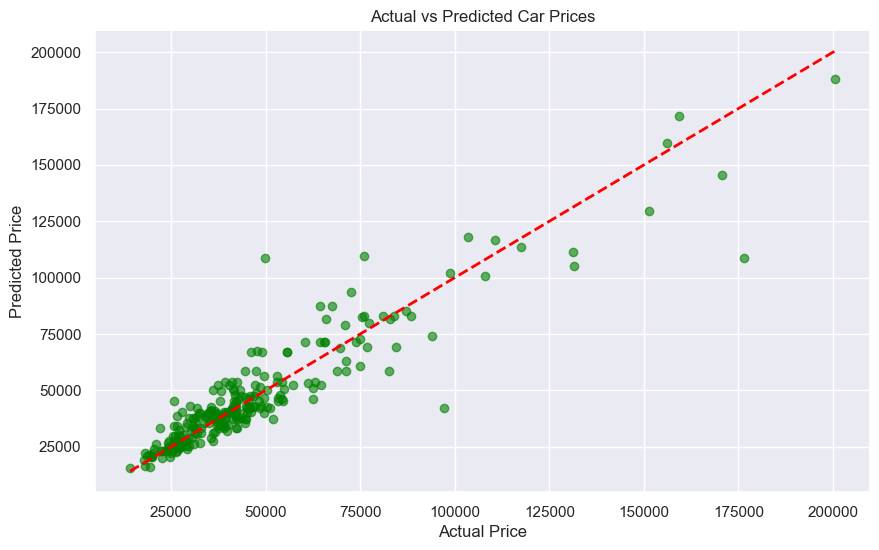

In [706]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

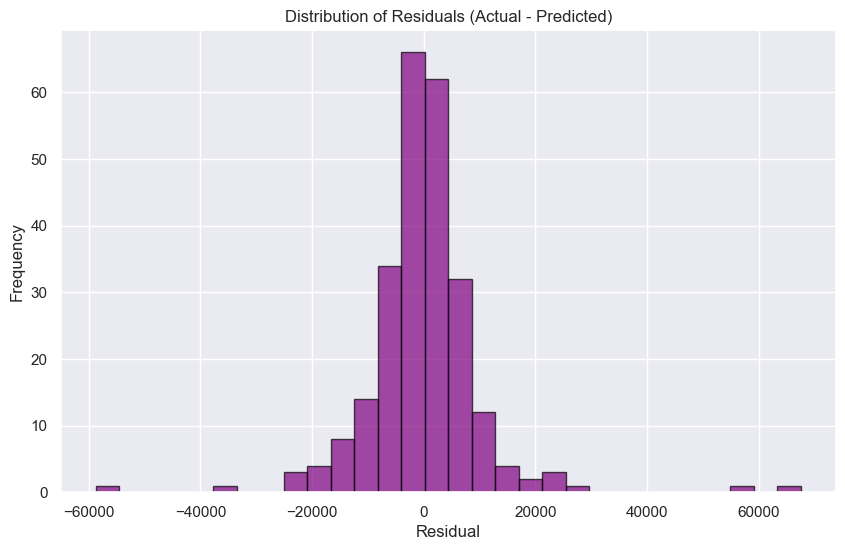

In [708]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cursor.close()
connection.close()